## Preprocessing the data

In [1]:
import pandas as pd

# Load dataset
df = pd.read_excel("Dots Glasses Potential Customer Survey Data.xlsx")

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Display dataset info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 29 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Unique ID                                                3220 non-null   int64 
 1   Country                                                  3220 non-null   object
 2   Age                                                      3220 non-null   int64 
 3   Annual Family Income ($)                                 3220 non-null   int64 
 4   Gender                                                   3220 non-null   object
 5   Time spent watching videos/TV                            3220 non-null   int64 
 6   Time spent playing indoor sports                         3220 non-null   int64 
 7   Time spent playing outdoor sports                        3220 non-null   int64 
 8   Total Time spent working in front of s

C:\Users\nr143\AppData\Local\Temp\ipykernel_25444\232078459.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


## 2.Identifying Key variables

C:\Users\nr143\AppData\Local\Temp\ipykernel_25444\3290974476.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


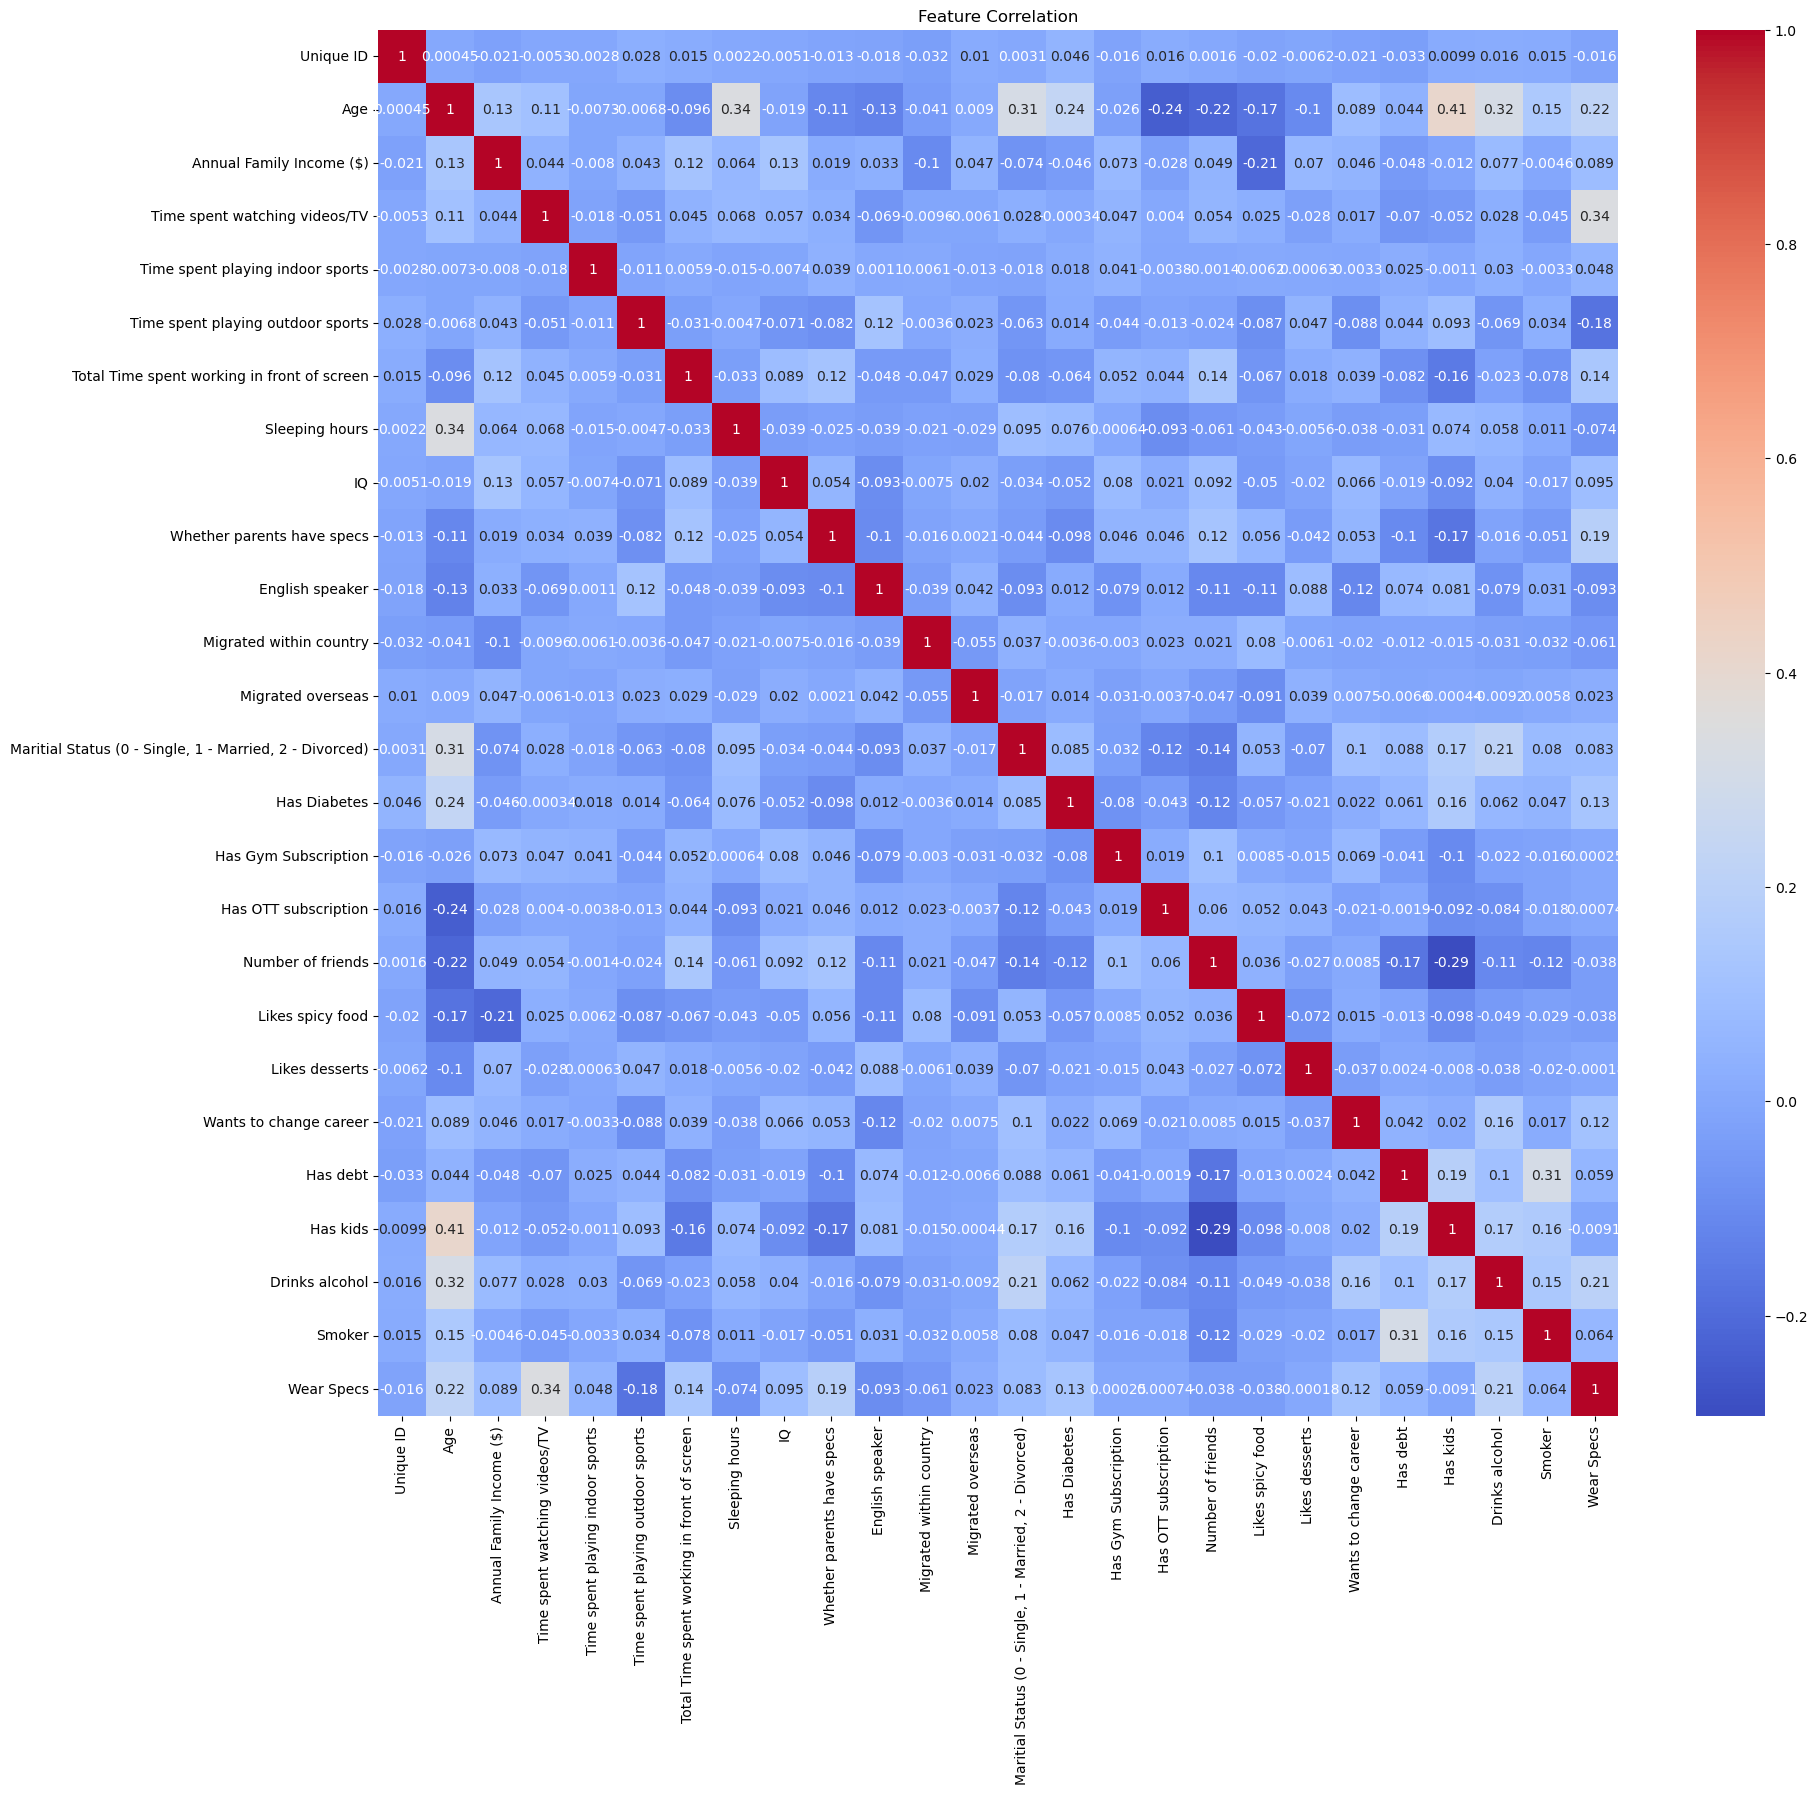

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check correlation between features
correlation_matrix = df.corr()
plt.figure(figsize=(20,18))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [5]:
# Identify highly correlated variables
important_features = correlation_matrix["Wear Specs"].sort_values(ascending=False)
print(important_features)


Wear Specs                                                 1.000000
Time spent watching videos/TV                              0.342571
Age                                                        0.221421
Drinks alcohol                                             0.205002
Whether parents have specs                                 0.190556
Total Time spent working in front of screen                0.139726
Has Diabetes                                               0.126125
Wants to change career                                     0.115028
IQ                                                         0.094830
Annual Family Income ($)                                   0.089451
Maritial Status (0 - Single, 1 - Married, 2 - Divorced)    0.083085
Smoker                                                     0.063791
Has debt                                                   0.059074
Time spent playing indoor sports                           0.048289
Migrated overseas                               

## 3.Calculating cut-off range for each country

In [7]:
# Group by country and calculate cut-offs
cutoffs = df.groupby("Country")["Wear Specs"].describe(percentiles=[0.25, 0.50, 0.75])
print(cutoffs)

         count      mean       std  min  25%  50%  75%  max
Country                                                    
CAN      881.0  0.578888  0.494018  0.0  0.0  1.0  1.0  1.0
IND      989.0  0.403438  0.490835  0.0  0.0  0.0  1.0  1.0
JPN      363.0  0.608815  0.488689  0.0  0.0  1.0  1.0  1.0
KOR      987.0  0.643364  0.479249  0.0  0.0  1.0  1.0  1.0


## 4.Visualizing country-wise data

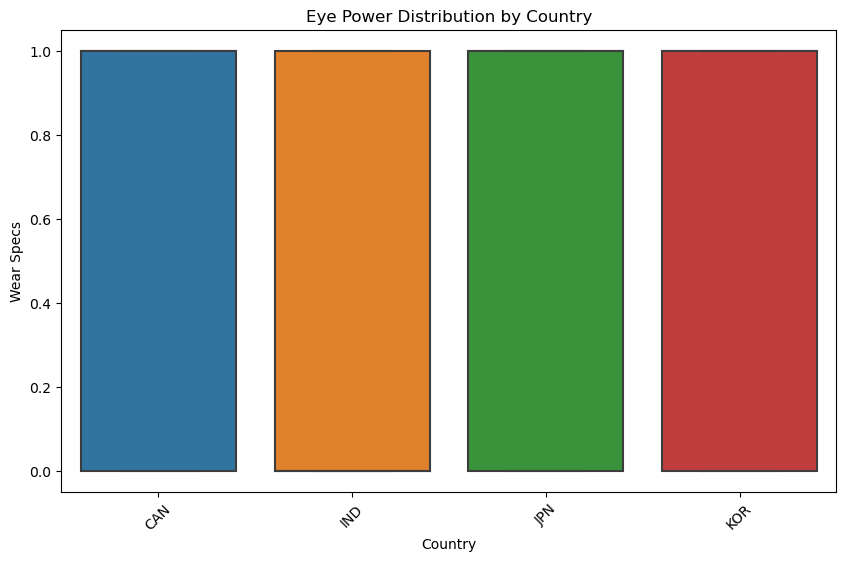

In [8]:
# Box plot to visualize eye power distribution by country
plt.figure(figsize=(10,6))
sns.boxplot(x="Country", y="Wear Specs", data=df)
plt.xticks(rotation=45)
plt.title("Eye Power Distribution by Country")
plt.show()

## 5.Estimating Impact of Underreporting in India

In [9]:
# Comparing India's cut-off against global trends
india_cutoff = cutoffs.loc["IND"]
global_avg = cutoffs.mean()

# Estimate additional specs wearers
potential_wearers = df[(df["Country"] == "IND") & (df["Wear Specs"] < global_avg["50%"])]
print(f"Estimated additional specs wearers in India: {len(potential_wearers)}")


Estimated additional specs wearers in India: 590
